In [1]:
# Initial import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
Wages = pd.read_excel("./Dataset - Average Wages (1).xlsx")

In [27]:
print("Genders:", Wages["Sex"].unique())
print()
print("Year:", Wages["Year"].unique())
print()
print("Geography:", Wages["Geography"].unique())
print()
print("Type of work:", Wages["Type of work"].unique())
print()
print("Education level:", Wages["Education level"].unique())
print()
print("Age group:", Wages["Age group"].unique())
print()
print("Wages:", Wages["Wages"].unique())

Genders: ['  Male' '  Female']

Year: [1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016]

Geography: ['Canada' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia']

Type of work: ['Both full- and part-time' '   Full-time ' '   Part-time ']

Education level: ['Total, all education levels' '   0 - 8  years' '   Some high school'
 '   High school graduate' '   Some post-secondary'
 '   Post-secondary certificate or diploma'
 '    Trade certificate or diploma' '    Community college, CEGEP'
 '    University certificate below bachelors degree'
 '   University degree' "      Bachelor's degree"
 "      Above bachelor's degree"]

Age group: ['15 years and over ' '15-24 years' '20-34 years' '25 years and over'
 '25-34 years' '25-54 years' '25-64 years' '55 years and over']

Wages: ['Total employees' 'Average hourly wage rate' 'Average weekl

In [80]:
avg = Wages_Hourly.loc[(Wages_Hourly["Wages"] == "Average hourly wage rate")].shape[0]
med = Wages_Hourly.loc[(Wages_Hourly["Wages"] == 'Median hourly wage rate')].shape[0]
zeros_avg = Wages_Hourly.loc[(Wages_Hourly["Wages"] == 'Average hourly wage rate') & (Wages_Hourly["Value"] == 0)].shape[0]
zeros_med = Wages_Hourly.loc[(Wages_Hourly["Wages"] == 'Median hourly wage rate') & (Wages_Hourly["Value"] == 0)].shape[0]

print("Avg wage reported:", avg, "; with # zeros:", zeros_avg)
print("Median was reported:", med, "; with # zeros:", zeros_med)

Avg wage reported: 115200 ; with # zeros: 16205
Median was reported: 115200 ; with # zeros: 16205


In [81]:
# Define a new datafram for Hourly Wages, only using median wage rate
Wages_Hourly = Wages.loc[(Wages["Wages"] == "Median hourly wage rate")]

# Remove "Canada" geography 
Wages_Hourly = Wages_Hourly.loc[Wages_Hourly["Geography"] != "Canada"]

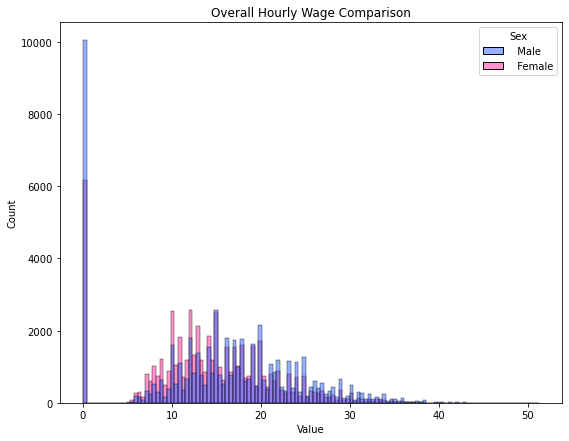

In [82]:
fig, ax = plt.subplots(figsize=(9,7))
colors = sns.color_palette(["#2e62ff", "#ff299f"])
sns.histplot(x="Value", hue="Sex", data=Wages_Hourly, palette=colors, ax=ax)
ax.set_title("Overall Hourly Wage Comparison")
plt.show()

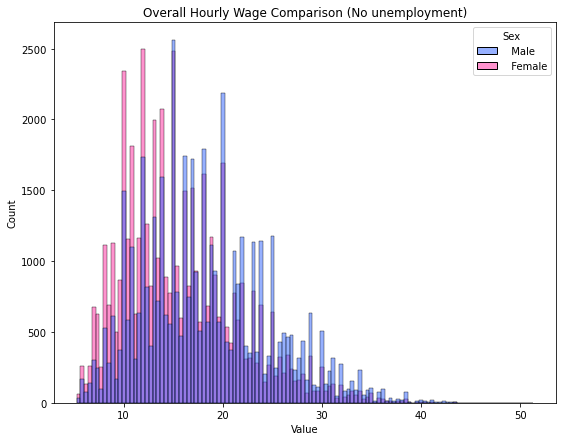

In [83]:
Wages_Employed = Wages_Hourly.loc[Wages_Hourly["Value"] != 0]

fig, ax = plt.subplots(figsize=(9,7))
colors = sns.color_palette(["#2e62ff", "#ff299f"])
sns.histplot(x="Value", hue="Sex", data=Wages_Employed, palette=colors, ax=ax)
ax.set_title("Overall Hourly Wage Comparison (No unemployment)")
plt.show()

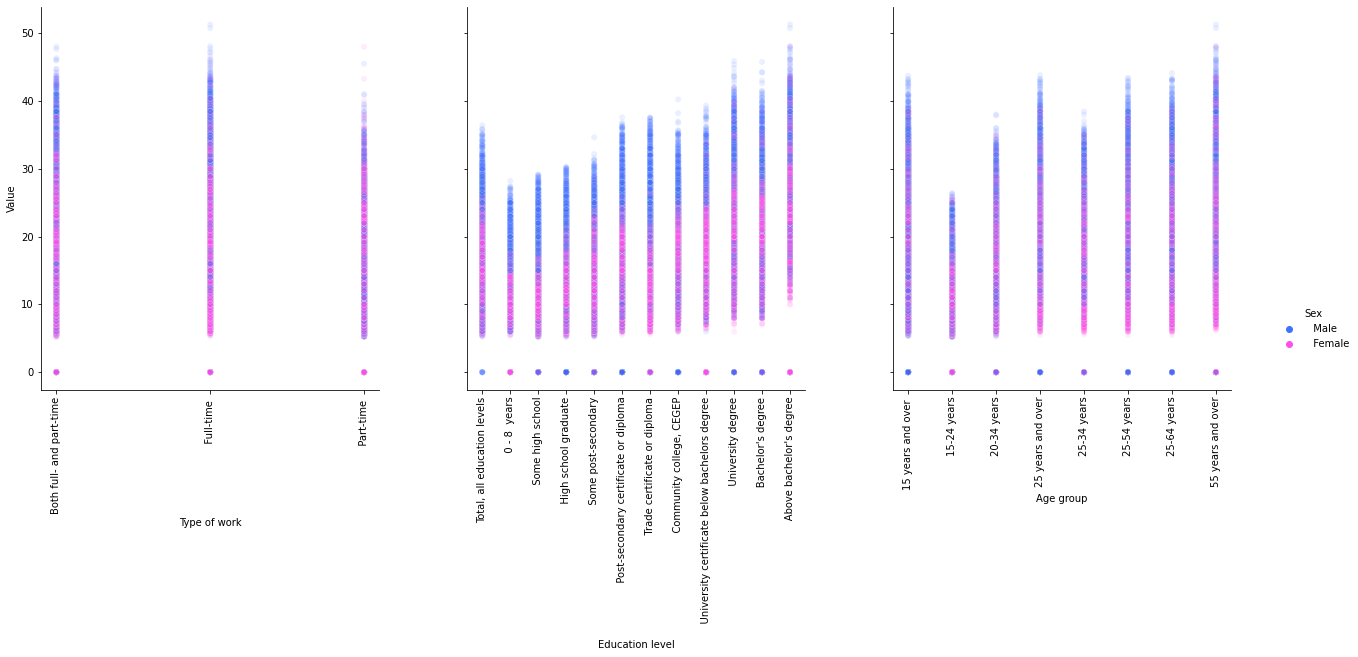

In [13]:
grid = sns.pairplot(
    data=Wages_Hourly,
    hue="Sex",
    palette=sns.color_palette(["#4271ff", "#ff4fea"]),
    x_vars=["Type of work", "Education level", "Age group"],
    y_vars=["Value"],
    diag_kind = None,
    height=6,
    plot_kws={'alpha':0.1},
)

# Rotate x-axis on each plot so they are readable
for ax in grid.axes.flat[:]:
    ax.tick_params(axis='x', labelrotation=90)

### Compare type of employment (Full- vs. Part-time)

In [14]:
# Type of Work has some interesting patterns - 
# Part-time is dominated by females, Full-time has males leading in wage values over females
Wages_Fulltime_Hourly = Wages_Hourly.loc[Wages_Hourly["Type of work"] == '   Full-time ']
Wages_Parttime_Hourly = Wages_Hourly.loc[Wages_Hourly["Type of work"] == '   Part-time ']

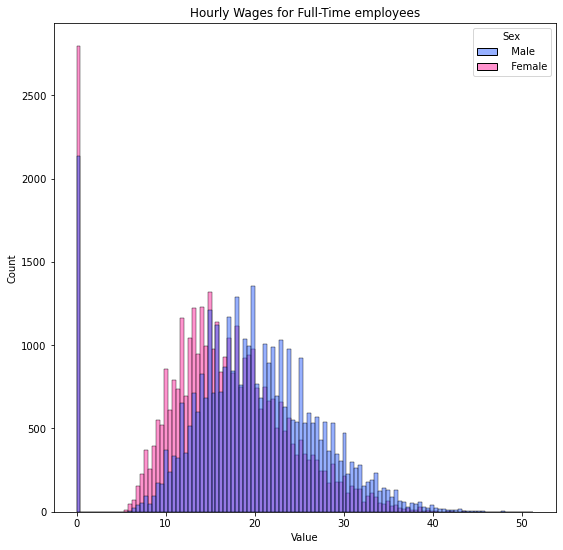

In [76]:
fig, ax = plt.subplots(figsize=(9,9))
colors = sns.color_palette(["#2e62ff", "#ff299f"])
sns.histplot(x="Value", hue="Sex", data=Wages_Fulltime_Hourly, palette=colors, ax=ax)
ax.set_title("Hourly Wages for Full-Time employees")
plt.show()

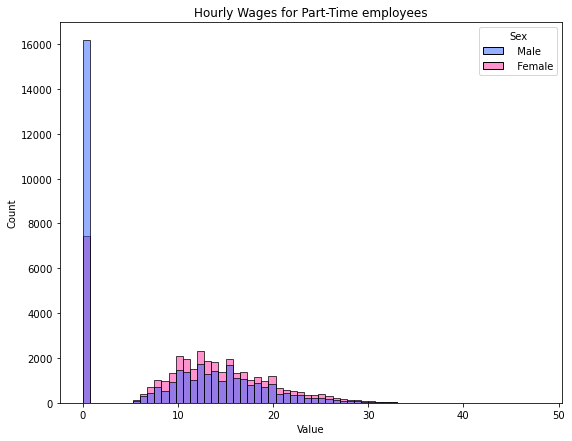

In [74]:
fig, ax = plt.subplots(figsize=(9,7))
colors = sns.color_palette(["#2e62ff", "#ff299f"])
sns.histplot(x="Value", hue="Sex", data=Wages_Parttime_Hourly, palette=colors, ax=ax)
ax.set_title("Hourly Wages for Part-Time employees")
plt.show()

In [40]:
m_0 = Wages_Fulltime_Hourly.loc[(Wages_Fulltime_Hourly["Value"] == 0) & (Wages_Fulltime_Hourly["Sex"] == "  Male")].shape[0]
f_0 = Wages_Fulltime_Hourly.loc[(Wages_Fulltime_Hourly["Value"] == 0) & (Wages_Fulltime_Hourly["Sex"] == "  Female")].shape[0]

print("Full-time Male employees w/ 0 wage:", m_0)
print("Full-time Female employees w/ 0 wage:", f_0)

Full-time Male employees w/ 0 wage: 2134
Full-time Female employees w/ 0 wage: 2796


In [41]:
m_0 = Wages_Parttime_Hourly.loc[(Wages_Parttime_Hourly["Value"] == 0) & (Wages_Parttime_Hourly["Sex"] == "  Male")].shape[0]
f_0 = Wages_Parttime_Hourly.loc[(Wages_Parttime_Hourly["Value"] == 0) & (Wages_Parttime_Hourly["Sex"] == "  Female")].shape[0]

print("Part-time Male employees w/ 0 wage:", m_0)
print("Part-time Female employees w/ 0 wage:", f_0)

Part-time Male employees w/ 0 wage: 16164
Part-time Female employees w/ 0 wage: 7448


### Check recession / boom periods

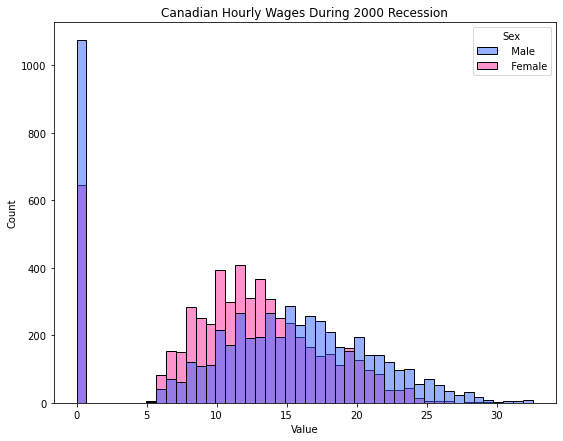

In [71]:
# Mild economic downturn in 2000
Recession_2000 = Wages_Hourly.loc[(Wages_Hourly["Year"] == 2000)]

fig, ax = plt.subplots(figsize=(9,7))
colors = sns.color_palette(["#2e62ff", "#ff299f"])
sns.histplot(x="Value", hue="Sex", data=Recession_2000, palette=colors, ax=ax)
ax.set_title("Canadian Hourly Wages During 2000 Recession")
plt.show()

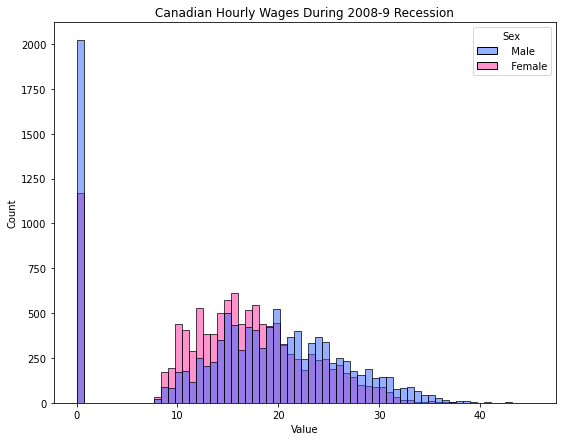

In [70]:
# Major recession beginning in 2008, recovery by 2010
Recession_2008 = Wages_Hourly.loc[(Wages_Hourly["Year"] == 2008) | (Wages_Hourly["Year"] == 2009)]

fig, ax = plt.subplots(figsize=(9,7))
colors = sns.color_palette(["#2e62ff", "#ff299f"])
sns.histplot(x="Value", hue="Sex", data=Recession_2008, palette=colors, ax=ax)
ax.set_title("Canadian Hourly Wages During 2008-9 Recession")
plt.show()

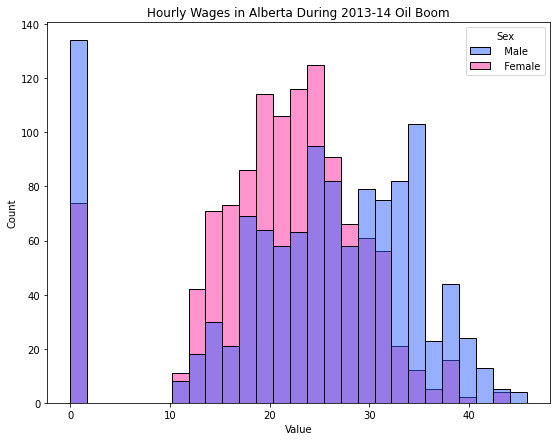

In [72]:
# Alberta oil boom 2013-14
Alberta_Oil_Boom = Wages_Hourly.loc[(Wages_Hourly["Geography"] == "Alberta") & ((Wages_Hourly["Year"] == 2013) | (Wages_Hourly["Year"] == 2014))]

fig, ax = plt.subplots(figsize=(9, 7))
colors = sns.color_palette(["#2e62ff", "#ff299f"])
sns.histplot(x="Value", hue="Sex", data=Alberta_Oil_Boom, palette=colors, ax=ax)
ax.set_title("Hourly Wages in Alberta During 2013-14 Oil Boom")
plt.show()